### workflow examples for memo_py

Possible example workflows of the framework are outlined below. The workflows are categorised into the sections

- A Networks and Simulations
    - A1 define a network
    - A2 simulate a network by the Gillespie algorithm
    - A3 simulate a network by the moment-based algorithm
- B Data handling
    - B1 load mean, variance and covariance data
    - B2 create *in silico* count data and transform to mean, variance and covariance (including bootstrapping)
- C Parameter and Model Evidence Estimation
    - C1 fit a model to example data (the model to its own in silico data)
    - C2 fit a selection of models to the *in silico* data
    - C3 fit a selection of models to the example data
- D Event times analysis
    - TODO: add here; simplify plotting interface
- E Various notes
- F Various notes: Calculating basic_sigma correction for CD44 data

to explain the different functionalities of this framework.

In [1]:
import memo_py as me
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pickle
import corner
%matplotlib inline

/Users/m651s/opt/anaconda3/envs/cd44_project/lib/python3.7/site-packages/tqdm/autonotebook.py:17: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


#### A Networks and Simulations

#### A1 define a network

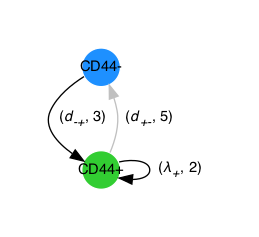

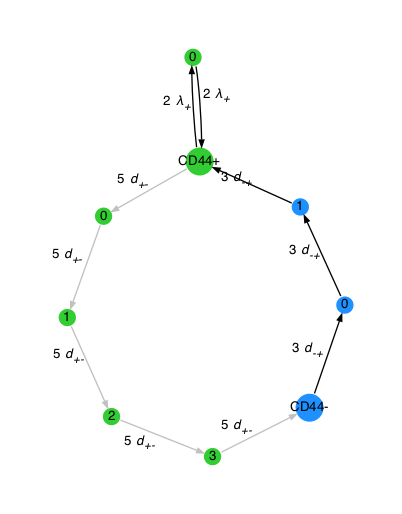

In [2]:
### input
topology_1 = [
        {'start': 'M_t', 'end': 'A_t', 'rate_symbol': 'd_ma', 'type': 'S -> E', 'reaction_steps': 3},
        {'start': 'A_t', 'end': 'M_t', 'rate_symbol': 'd_am', 'type': 'S -> E', 'reaction_steps': 5},
        {'start': 'A_t', 'end': 'A_t', 'rate_symbol': 'la_a', 'type': 'S -> S + S', 'reaction_steps': 2}
        ]

### computation
net = me.Network('net_1')
net.structure(topology_1)

### plot the network (main and hidden layer)
# NOTE: html scripted labels can be used for text formatting
node_settings = {
    'A_t': {'label': 'CD44+', 'color': 'limegreen'},
    'M_t': {'label': 'CD44-', 'color': 'dodgerblue'}
}

# empty string ('') to not show label
# None or 'some color' to set color (default='grey35')
edge_settings = {
    'd_ma': {'label': '<I>d<sub>-+</sub></I>', 'color': None}, # < <I>d<sub>-+</sub></I> >
    'd_am': {'label': '<I>d<sub>+-</sub></I>', 'color': 'grey'},
    'la_a': {'label': '<I>&lambda;<sub>+</sub></I>', 'color': None}
}

me.plots.net_main_plot(net, node_settings=node_settings, edge_settings=edge_settings)
a = me.plots.net_hidden_plot(net, node_settings=node_settings, edge_settings=edge_settings)

#### A2 simulate a network by the Gillespie algorithm

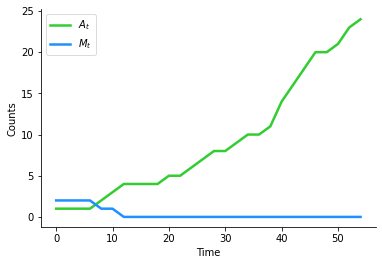

In [4]:
### input
topology_1 = [
        {'start': 'M_t', 'end': 'A_t', 'rate_symbol': 'd_ma', 'type': 'S -> E', 'reaction_steps': 5},
        {'start': 'A_t', 'end': 'A_t', 'rate_symbol': 'la_a', 'type': 'S -> S + S', 'reaction_steps': 5}
        ]


initial_values = {'M_t': 2, 'A_t': 1}
theta_values = {'la_a': 0.06, 'd_ma': 0.04}
time_values = np.linspace(0.0, 54.0, num=28, endpoint=True)
variables = {'M_t': ('M_t', ), 'A_t': ('A_t', )}

### computation
net = me.Network('net_1')
net.structure(topology_1)

sim = me.Simulation(net)
res = sim.simulate('gillespie', initial_values, theta_values, time_values, variables)

### plotting
settings = {
    'A_t': {'label': '$A_t$', 'color': 'limegreen'},
    'M_t': {'label': '$M_t$', 'color': 'dodgerblue'}
}

me.plots.sim_counts_plot(sim, settings=settings) # , settings=settings

#### A3 simulate a network by the moment-based algorithm

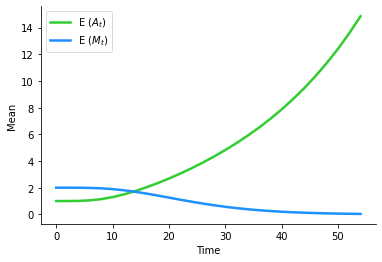

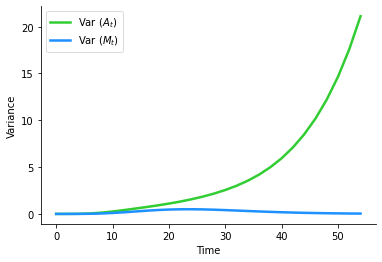

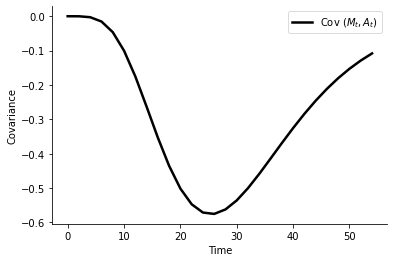

In [5]:
### computation
sim = me.Simulation(net)
res = sim.simulate('moments', initial_values, theta_values, time_values, variables)

### plotting
# mean
settings = {
    'A_t': {'label': 'E $(A_t)$', 'color': 'limegreen'},
    'M_t': {'label': 'E $(M_t)$', 'color': 'dodgerblue'}
}
me.plots.sim_mean_plot(sim, settings=settings)

# var
settings = {
    ('A_t', 'A_t'): {'label': 'Var $(A_t)$', 'color': 'limegreen'},
    ('M_t', 'M_t'): {'label': 'Var $(M_t)$', 'color': 'dodgerblue'}
}
me.plots.sim_variance_plot(sim, settings=settings)

# cov
settings = {
    ('A_t', 'M_t'): {'label': 'Cov $(M_t, A_t)$', 'color': 'black'}
}
me.plots.sim_covariance_plot(sim, settings=settings)

#### A4 derive the symbolic moment equations for a defined network

#### B Data handling

#### B1 load mean, variance and covariance data

In [26]:
### load predefined data set with pickle
# count_data_cd44_manual_counting_18_01_14_filtered
data = pickle.load(open('count_data_cd44_manual_counting_18_01_14_filtered_sigma022.pickle', 'rb'))
print(data.data_name)

# plt.plot(time_values, (data.data_variance[0, 0, :])**0.5 / data.data_mean[0, 0, :])

# (data.data_variance[0, 0, :])**0.5 / data.data_mean[0, 0, :]

data.data_counts[0, :, :].shape
np.array([[0.0, 0.0, 1.0, 2.0], [0.0, 0.0, 0.0, 1.0]]).shape

me.Data.event_find_second_cell_count_increase_after_first_cell_count_increase_after_cell_type_conversion(
                         data,
                         np.array([[4.0, 3.0, 3.0, 4.0, 5.0],
                                   [1.0, 2.0, 2.0, 2.0, 2.0]]),
                         np.array([0.0, 1.0, 2.0, 3.0, 4.0]), diff=False)

count_data_cd44_manual_counting_18_01_14_filtered_sigma022


(True, 4.0)

In [33]:
me.Data.event_find_third_cell_count_increase_after_first_and_second_cell_count_increase_after_cell_type_conversion(
                       data,
                        np.array([[4.0, 3.0, 3.0, 4.0, 5.0, 5.0],
                                  [1.0, 2.0, 2.0, 2.0, 2.0, 3.0]]),
                       np.array([0.0, 1.0, 2.0, 3.0, 4.0, 5.0]), diff=True)

(True, 1.0)

In [5]:
data = me.Data('my_data')
variables = ['A', 'B']
time_values = np.linspace(0.0, 4.0, num=5)
count_data = np.array([[[0.0, 0.0, 2.0, 2.0, 4.0], [1.0, 1.0, 1.0, 1.0, 0.0]],
                     [[0.0, 1.0, 2.0, 4.0, 4.0], [1.0, 1.0, 0.0, 0.0, 0.0]],
                     [[0.0, 1.0, 1.0, 4.0, 4.0], [1.0, 1.0, 0.0, 0.0, 0.0]],
                    [[0.0, 0.0, 0.0, 2.0, 4.0], [1.0, 0.0, 0.0, 0.0, 0.0]]])
data.load(variables, time_values, count_data)



[[[0.         0.5        1.25       3.         4.        ]
  [1.         0.75       0.25       0.25       0.        ]]

 [[0.         0.25096378 0.41313568 0.50182694 0.        ]
  [0.         0.21847682 0.21654396 0.21624184 0.        ]]]
[[[0.         0.33333333 0.91666667 1.33333333 0.        ]
  [0.         0.25       0.25       0.25       0.        ]]

 [[0.         0.10247419 0.39239737 0.406103   0.        ]
  [0.         0.13197367 0.13279328 0.13272021 0.        ]]]
[[[ 0.          0.16666667  0.25       -0.33333333  0.        ]]

 [[ 0.          0.11379549  0.18195518  0.22722941  0.        ]]]


In [6]:
print(data.data_mean[0, :, :])
# print(data.data_variance)
# print(data.data_covariance)

[[0.   0.5  1.25 3.   4.  ]
 [1.   0.75 0.25 0.25 0.  ]]


In [10]:
sol_mean = np.array([[[0.,         0.5,        1.25,       3.,         4.        ],
                              [1.,         0.75,       0.25,       0.25,       0.        ]],
                             [[0.,         0.25096378, 0.41313568, 0.50182694, 0.        ],
                              [0.,         0.21847682, 0.21654396, 0.21624184, 0.        ]]])
np.testing.assert_allclose(sol_mean, data.data_mean, rtol=0.1)

In [57]:
count_data = np.array([[[0.0, 0.0, 1.0, 2.0], [0.0, 0.0, 0.0, 1.0]],
                        [[0.0, 0.0, 1.0, 2.0], [0.0, 0.0, 0.0, 1.0]],
                      [[0.0, 0.0, 1.0, 2.0], [0.0, 0.0, 0.0, 1.0]]])
count_data.shape

(3, 2, 4)

in_silico_data_cd44_highcell_10000wells_sigma0001


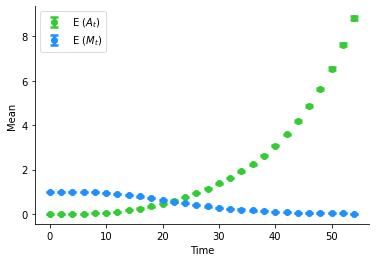

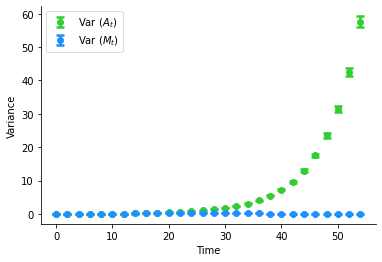

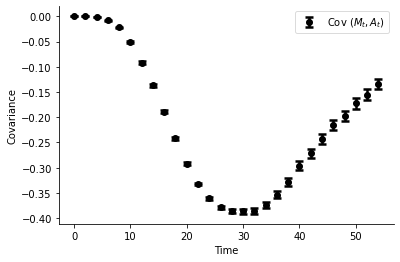

In [113]:
### load predefined data set with pickle
# count_data_cd44_manual_counting_18_01_14_filtered
data = pickle.load(open('in_silico_data_cd44_highcell_10000wells_sigma0001.pickle', 'rb'))
print(data.data_name)

### plotting
# mean
settings = {
    'A_t': {'label': 'E $(A_t)$', 'color': 'limegreen'},
    'M_t': {'label': 'E $(M_t)$', 'color': 'dodgerblue'}
}
me.plots.data_mean_plot(data, settings=settings, save='count_data_mean.pdf')

# var
settings = {
    ('A_t', 'A_t'): {'label': 'Var $(A_t)$', 'color': 'limegreen'},
    ('M_t', 'M_t'): {'label': 'Var $(M_t)$', 'color': 'dodgerblue'}
}
me.plots.data_variance_plot(data, settings=settings, save='count_data_var.pdf')

# cov
settings = {
    ('M_t', 'A_t'): {'label': 'Cov $(M_t, A_t)$', 'color': 'black'}
}
me.plots.data_covariance_plot(data, settings=settings, save='count_data_cov.pdf')


In [7]:
print(data.data_mean[1, :, :])
print(data.data_variance[1, :, :])
print(data.data_covariance[1, :, :])

[[0.001      0.001      0.001      0.001      0.001      0.031453
  0.04340501 0.05167448 0.06317291 0.0771729  0.07817533 0.09276039
  0.09354182 0.10810918 0.10618146 0.11198674 0.12976338 0.13560213
  0.15342987 0.16823561 0.18334817 0.20529588 0.23497553 0.26608806
  0.29885444 0.33790002 0.3583498  0.38582198]
 [0.001      0.001      0.001      0.001      0.001      0.03142774
  0.04322882 0.05168888 0.06308246 0.06875952 0.07022969 0.07253398
  0.07513979 0.0753603  0.07443435 0.07241361 0.07282207 0.07263776
  0.07142333 0.07011769 0.06710319 0.06299646 0.06095351 0.06076622
  0.0607317  0.06322702 0.07280397 0.07082058]]
[[0.001      0.001      0.001      0.001      0.001      0.02866057
  0.03547979 0.03776581 0.03491499 0.06474123 0.06179268 0.1467302
  0.13580757 0.25503548 0.24673574 0.23609492 0.21958438 0.20346645
  0.21486194 0.24198948 0.28238328 0.27425167 0.39159952 0.44538279
  0.58747686 0.70793561 0.77170019 0.95944562]
 [0.001      0.001      0.001      0.001     

/Users/m651s/opt/anaconda3/envs/cd44_project/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.
/Users/m651s/opt/anaconda3/envs/cd44_project/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


array([        nan,         nan, 24.98124109, 10.99833241,  6.64993823,
        4.24269116,  3.13615907,  2.48520959,  2.0272739 ,  1.71280536,
        1.473235  ,  1.30114068,  1.17798208,  1.08930799,  1.02267242,
        0.97624402,  0.94566243,  0.91706536,  0.89639272,  0.88295612,
        0.8759384 ,  0.86651259,  0.86321598,  0.86267861,  0.86065712,
        0.8585359 ,  0.85764545,  0.86021648])

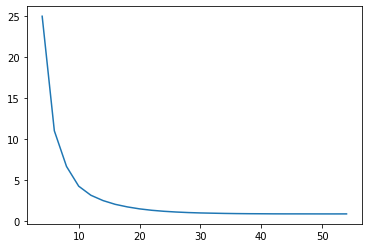

In [116]:
plt.plot(time_values, (data.data_variance[0, 0, :])**0.5 / data.data_mean[0, 0, :])

(data.data_variance[0, 0, :])**0.5 / data.data_mean[0, 0, :]

In [16]:
# ### thin out data
print(data.data_counts.shape)
# print(np.linspace(0.0, 54.0, num=4, endpoint=True))
# # 0, 9, 18, 27
# data_counts_thin = data.data_counts[:, :, (0, 9, 18, 27)]
# print(data_counts_thin.shape)

(44, 2, 28)


In [20]:
### remove data points that require "basic sigma"
# data_counts_no_sigma = data.data_counts[:, :, (0, ) + tuple(range(5, 28))]
# print(np.linspace(0.0, 54.0, num=28, endpoint=True)[[0] + list(range(5, 28))])
# print((0, ) + tuple(range(5, 28)))
# print(data_counts_no_sigma.shape)
# print(len(np.linspace(0.0, 54.0, num=28, endpoint=True)))
# np.linspace(0.0, 54.0, num=28, endpoint=True)[[0, 1]]

data_counts_48h = data.data_counts[:, :, range(0, 25)]
print(data_counts_48h.shape)
print(np.linspace(0.0, 48.0, num=25, endpoint=True))

(44, 2, 25)
[ 0.  2.  4.  6.  8. 10. 12. 14. 16. 18. 20. 22. 24. 26. 28. 30. 32. 34.
 36. 38. 40. 42. 44. 46. 48.]


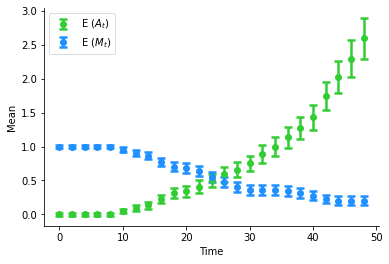

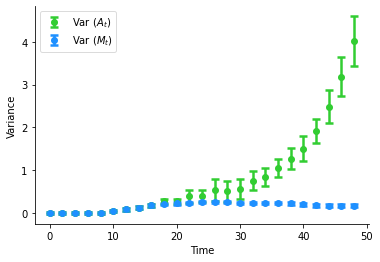

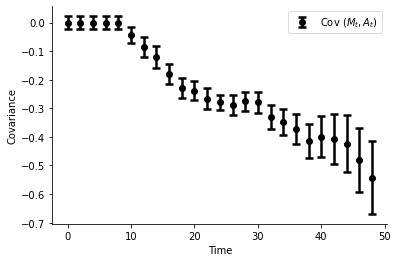

In [21]:
### creation of a new data object
# count_data_cd44_manual_counting_18_01_14_filtered_thin4
# count_data_cd44_manual_counting_18_01_14_filtered_nosigma
data_name = 'count_data_cd44_manual_counting_18_01_14_filtered_48h'

data_input = {
    # general settings
    'variables': ['A_t', 'M_t'], # indices here are matched to indices of data
    'data_type': 'counts', # 'summary' or 'counts'
    
    # time points
    'time_values': np.linspace(0.0, 48.0, num=25, endpoint=True), # [[0] + list(range(5, 26))],
    # np.linspace(0.0, 54.0, num=28, endpoint=True)
    # np.linspace(0.0, 54.0, num=4, endpoint=True), # shape (# time_values, )
    
    # if data_type 'summary'
    'mean_data': np.array([]), # shape (2, # variables, # time_values)
    'var_data': np.array([]), # variance, shape (2, # variables, # time_values)
    'cov_data': np.array([]), # covariance, shape (2, # variables, # time_values)
    
    # if data_type 'counts'
    'count_data': data_counts_48h, # data.data_counts[:, :, (0,) + tuple(range(5, 26))], # data_counts_thin # shape (# number of simulations, # variables, # time_values)
    'bootstrap_samples': 100000, # 10000 (testing), 100000 (important)
    
    # handling of standard errors that are zero
    # all standard errors <= basic_sigma, will be set to basic_sigma
    'basic_sigma': 0.022 # 0.01, 0.001
}

data = me.Data(data_name)
data.load(data_input)

### plotting
# mean
settings = {
    'A_t': {'label': 'E $(A_t)$', 'color': 'limegreen'},
    'M_t': {'label': 'E $(M_t)$', 'color': 'dodgerblue'}
}
me.plots.data_mean_plot(data, settings=settings)

# var
settings = {
    ('A_t', 'A_t'): {'label': 'Var $(A_t)$', 'color': 'limegreen'},
    ('M_t', 'M_t'): {'label': 'Var $(M_t)$', 'color': 'dodgerblue'}
}
me.plots.data_variance_plot(data, settings=settings)

# cov
settings = {
    ('M_t', 'A_t'): {'label': 'Cov $(M_t, A_t)$', 'color': 'black'}
}
me.plots.data_covariance_plot(data, settings=settings)

In [22]:
print(data.data_mean[1, :, :])
print(data.data_variance[1, :, :])
print(data.data_covariance[1, :, :])

[[0.022      0.022      0.022      0.022      0.022      0.0314229
  0.04324203 0.05159101 0.06297729 0.07714956 0.07824996 0.09247553
  0.09413817 0.10793444 0.10614105 0.11134176 0.12949549 0.13658447
  0.15266525 0.16771575 0.18278376 0.20604723 0.23499622 0.26607085
  0.29767071]
 [0.022      0.022      0.022      0.022      0.022      0.03142654
  0.0434109  0.05189896 0.06307759 0.06890907 0.07029791 0.0725155
  0.07491036 0.07520619 0.07423594 0.07249768 0.07241365 0.0727938
  0.07137605 0.07012989 0.06697609 0.06317328 0.06096803 0.0607452
  0.0608983 ]]
[[0.022      0.022      0.022      0.022      0.022      0.02860581
  0.03561818 0.0378537  0.03487943 0.06439642 0.06188014 0.14752936
  0.13522488 0.25701401 0.24665811 0.23663063 0.21977306 0.20345165
  0.21393813 0.24224605 0.28093891 0.27243199 0.3906253  0.44492446
  0.58395456]
 [0.022      0.022      0.022      0.022      0.022      0.02873364
  0.03555614 0.03779862 0.03494857 0.02881428 0.02648203 0.022
  0.022      0

In [23]:
### store python object of the in silico data with pickle
print(data.data_name)
with open('count_data_cd44_manual_counting_18_01_14_filtered_48h.pickle', 'wb') as file_:
    pickle.dump(data, file_)

count_data_cd44_manual_counting_18_01_14_filtered_48h


#### B2 load count data and transform to mean, variance and covariance (including bootstrapping)

In [108]:
### run simulations to obtain in silico counts
num_iter = 1000 # 44 # 40 # 40, 1000

topology_1 = [
        {'start': 'M_t', 'end': 'A_t', 'rate_symbol': 'd_ma', 'type': 'S -> E', 'reaction_steps': 5},
        {'start': 'A_t', 'end': 'A_t', 'rate_symbol': 'la_a', 'type': 'S -> S + S', 'reaction_steps': 5}
        ]

initial_values = {'M_t': 1, 'A_t': 0}
theta_values = {'la_a': 0.100, 'd_ma': 0.040} # 0.060, 0.030 OR 0.100, 0.050 OR 0.100, 0.040
time_values = np.linspace(0.0, 54.0, num=28, endpoint=True) # num=28, num=4, num=2
variables = {'M_t': ('M_t', ), 'A_t': ('A_t', )}

net = me.Network('net_1')
net.structure(topology_1)

sim = me.Simulation(net)
res_list = list()

for __ in range(num_iter):
    res_list.append(sim.simulate('gillespie', initial_values, theta_values, time_values, variables)[1])

in_silico_counts = np.array(res_list)



In [40]:
# time_values = np.linspace(0.0, 54.0, num=28, endpoint=True)[[0] + list(range(5, 28))]
# np.linspace(0.0, 54.0, num=28, endpoint=True)
# time_values
# data_counts_nosigma = data.data_counts[:, :, (0,) + tuple(range(5, 28))]
# data_counts_nosigma.shape

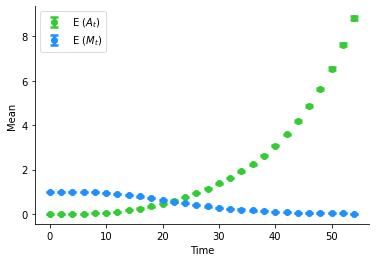

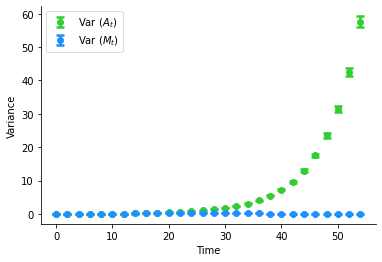

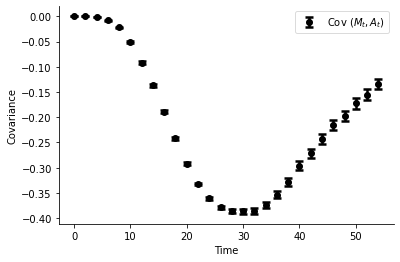

In [110]:
### creation of a new data object
data_name = 'in_silico_data_cd44_highcell_10000wells_sigma0001'

data_input = {
    # general settings
    'variables': ['A_t', 'M_t'], # indices here are matched to indices of data
    'data_type': 'counts', # 'summary' or 'counts'
    
    # time points
    'time_values': time_values, # shape (# time_values, )
    
    # if data_type 'summary'
    'mean_data': np.array([]), # shape (2, # variables, # time_values)
    'var_data': np.array([]), # variance, shape (2, # variables, # time_values)
    'cov_data': np.array([]), # covariance, shape (2, # variables, # time_values)
    
    # if data_type 'counts'
    'count_data': in_silico_counts, # in_silico_counts, 
                # shape (# number of simulations, # variables, # time_values)
    'bootstrap_samples': 10000, # 100000
    
    # handling of standard errors that are zero
    # all standard errors <= basic_sigma, will be set to basic_sigma
    'basic_sigma': 0.0001 # 0.01, 0.001
}

data = me.Data(data_name)
data.load(data_input)

### plotting
# mean
settings = {
    'A_t': {'label': 'E $(A_t)$', 'color': 'limegreen'},
    'M_t': {'label': 'E $(M_t)$', 'color': 'dodgerblue'}
}
me.plots.data_mean_plot(data, settings=settings)

# var
settings = {
    ('A_t', 'A_t'): {'label': 'Var $(A_t)$', 'color': 'limegreen'},
    ('M_t', 'M_t'): {'label': 'Var $(M_t)$', 'color': 'dodgerblue'}
}
me.plots.data_variance_plot(data, settings=settings)

# cov
settings = {
    ('M_t', 'A_t'): {'label': 'Cov $(M_t, A_t)$', 'color': 'black'}
}
me.plots.data_covariance_plot(data, settings=settings)

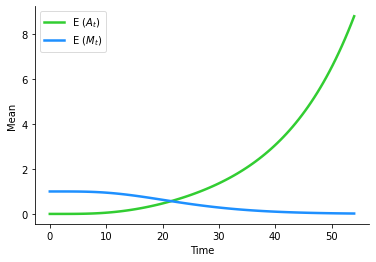

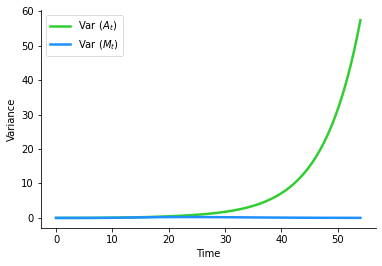

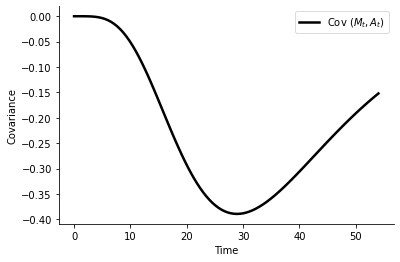

In [106]:
### compare to exact moments
topology_1 = [
        {'start': 'M_t', 'end': 'A_t', 'rate_symbol': 'd_ma', 'type': 'S -> E', 'reaction_steps': 5},
        {'start': 'A_t', 'end': 'A_t', 'rate_symbol': 'la_a', 'type': 'S -> S + S', 'reaction_steps': 5}
        ]

initial_values = {'M_t': 1.0, 'A_t': 0.0}
theta_values = {'la_a': 0.100, 'd_ma': 0.040} # 0.060, 0.030 OR 0.100, 0.030 OR 0.100, 0.040
time_values = np.linspace(0.0, 54.0, num=100, endpoint=True) # num=28
variables = {'M_t': ('M_t', ), 'A_t': ('A_t', )}

net = me.Network('net_1')
net.structure(topology_1)

sim = me.Simulation(net)
res = sim.simulate('moments', initial_values, theta_values, time_values, variables)

### plotting
# mean
settings = {
    'A_t': {'label': 'E $(A_t)$', 'color': 'limegreen'},
    'M_t': {'label': 'E $(M_t)$', 'color': 'dodgerblue'}
}
me.plots.sim_mean_plot(sim, settings=settings, save='moments_mean.pdf')

# var
settings = {
    ('A_t', 'A_t'): {'label': 'Var $(A_t)$', 'color': 'limegreen'},
    ('M_t', 'M_t'): {'label': 'Var $(M_t)$', 'color': 'dodgerblue'}
}
me.plots.sim_variance_plot(sim, settings=settings, save='moments_var.pdf')

# cov
settings = {
    ('A_t', 'M_t'): {'label': 'Cov $(M_t, A_t)$', 'color': 'black'}
}
me.plots.sim_covariance_plot(sim, settings=settings, save='moments_cov.pdf')

In [111]:
### store python object of the in silico data with pickle
print(data.data_name)
with open('in_silico_data_cd44_highcell_10000wells_sigma0001.pickle', 'wb') as file_:
    pickle.dump(data, file_)

in_silico_data_cd44_highcell_10000wells_sigma0001


In [112]:
print(data.data_mean[1, :, :])
print(data.data_variance[1, :, :])
print(data.data_covariance[1, :, :])

[[0.0001     0.0001     0.0003977  0.0009088  0.00151962 0.00231032
  0.0031654  0.00401734 0.00484    0.00588484 0.00686017 0.00786888
  0.00895699 0.010276   0.01165745 0.01333092 0.01524138 0.01747423
  0.01997767 0.02306269 0.02715383 0.0310323  0.03595561 0.04155029
  0.04835392 0.05684962 0.06482528 0.07598522]
 [0.0001     0.0001     0.00039669 0.00090192 0.00148766 0.0022298
  0.00297298 0.00353016 0.00410621 0.00450292 0.00483116 0.00505713
  0.00499696 0.00492095 0.00470598 0.00453872 0.00421044 0.0039596
  0.00364292 0.00330783 0.00298363 0.00265743 0.00233848 0.00207141
  0.00182386 0.00161603 0.00143286 0.00121202]]
[[1.00000000e-04 1.00000000e-04 3.94511582e-04 8.80912043e-04
  1.57016999e-03 2.22266107e-03 3.46236117e-03 4.38463410e-03
  5.91771388e-03 7.43209472e-03 9.69299877e-03 1.27516930e-02
  1.76956844e-02 2.36559868e-02 3.24028152e-02 4.56738752e-02
  6.27890432e-02 8.04065956e-02 1.09432624e-01 1.48361199e-01
  2.04183818e-01 2.70162314e-01 3.56274357e-01 4.9812

#### B3 simulate moments of a network and load as *in silico* data

#### C Parameter and Model Evidence Estimation

#### C1 fit a model to example data (the model to its own *in silico* data)

In [6]:
### list of models (just one here)

def make_model(steps_d, steps_l):
    name = 'net_' + str(steps_d) + '_' + str(steps_l)
    
    topology = [
        {'start': 'M_t', 'end': 'A_t', 'rate_symbol': 'd_ma', 'type': 'S -> E', 'reaction_steps': steps_d},
        {'start': 'A_t', 'end': 'A_t', 'rate_symbol': 'la_a', 'type': 'S -> S + S', 'reaction_steps': steps_l}
        ]
    
    setup = {'initial_values': {'M_t': 1.0, 'A_t': 0.0}, 'theta_bounds': {'d_ma': (0.0, 0.15), 'la_a': (0.0, 0.15)}, 'variables': {'M_t': ('M_t', ), 'A_t': ('A_t', )}}

    return (name, topology, setup)

list_models = [make_model(steps_d, steps_l) for steps_d in range(1, 7) for steps_l in range(1, 7)]
print(len(list_models))
# topology_1 = [
#         {'start': 'X_t', 'end': 'Y_t', 'rate_symbol': 'd_01', 'type': 'S -> E', 'reaction_steps': 8},
#         {'start': 'Y_t', 'end': 'Y_t', 'rate_symbol': 'la_1', 'type': 'S -> S + S', 'reaction_steps': 8}
#         ]

# setup_1 = {'initial_values': {'X_t': 1.0, 'Y_t': 0.0}, 'theta_bounds': {'d_01': (0.0, 0.15), 'la_1': (0.0, 0.15)}, 'variables': {'X_t': ('X_t', ), 'Y_t': ('Y_t', )}}

# topology_2 = [
#         {'start': 'X_t', 'end': 'Y_t', 'rate_symbol': 'd_01', 'type': 'S -> E', 'reaction_steps': 5},
#         {'start': 'Y_t', 'end': 'Y_t', 'rate_symbol': 'la_1', 'type': 'S -> S + S', 'reaction_steps': 5}
#         ]

# setup_2 = {'initial_values': {'X_t': 1.0, 'Y_t': 0.0}, 'theta_bounds': {'d_01': (0.0, 0.15), 'la_1': (0.0, 0.15)}, 'variables': {'X_t': ('X_t', ), 'Y_t': ('Y_t', )}}

# topology_3 = [
#        {'start': 'X_t', 'end': 'Y_t', 'rate_symbol': 'd_01', 'type': 'S -> E', 'reaction_steps': 3},
#        {'start': 'Y_t', 'end': 'Y_t', 'rate_symbol': 'la_1', 'type': 'S -> S + S', 'reaction_steps': 3}
#        ]
# setup_3 = {'initial_values': {'X_t': 1.0, 'Y_t': 0.0}, 'theta_bounds': {'d_01': (0.0, 0.15), 'la_1': (0.0, 0.15)}, 'variables': {'X_t': ('X_t', ), 'Y_t': ('Y_t', )}}

# topology_4 = [
#        {'start': 'X_t', 'end': 'Y_t', 'rate_symbol': 'd_01', 'type': 'S -> E', 'reaction_steps': 1},
#        {'start': 'Y_t', 'end': 'Y_t', 'rate_symbol': 'la_1', 'type': 'S -> S + S', 'reaction_steps': 1}
#        ]
# setup_4 = {'initial_values': {'X_t': 1.0, 'Y_t': 0.0}, 'theta_bounds': {'d_01': (0.0, 0.15), 'la_1': (0.0, 0.15)}, 'variables': {'X_t': ('X_t', ), 'Y_t': ('Y_t', )}}


# list_models = [
#     [('net_1'), (topology_1), (setup_1)],
#     [('net_2'), (topology_2), (setup_2)],
#     [('net_3'), (topology_3), (setup_3)],
#     [('net_4'), (topology_4), (setup_4)]
# ]


### load the in silico data from section B
data = pickle.load(open('in_silico_data_cd44_thin2.pickle', 'rb'))
print(data.data_name)


36
in_silico_data_cd44_thin2


In [7]:
### input for selection
d = {
# model set
'model_set': list_models,

# data/model settings
'data': data,
'mean_only': False, # True or False

# nested sampling settings
'nlive':                    1000, # 250 # 1000
'tolerance':                0.01, # 0.1 # 0.05 # 0.01
'bound':                    'multi',
'sample':                   'unif'
}

### computation, result is a list of Estimation class instances
res = me.select_models(d)


In [7]:
### computation, result is a list of Estimation class instances
res = me.select_models(d, parallel={'do':False})

In [8]:
### save in silico estimation with pickle
with open('cd44_count_data_thin_estimation.pickle', 'wb') as file_: # in_silico_estimation
    pickle.dump(res, file_)

In [8]:
### load in silico estimation with pickle
res_1 = pickle.load(open('estimation_in_silico_data_cd44_highcell_10000wells_sigma0001_minimal2.pickle', 'rb')) # in_silico_estimation
# res_2 = pickle.load(open('estimation_count_data_cd44_filtered_sigma022_min_div2.pickle', 'rb')) # in_silico_estimation
# print(res)
# print(res_2)
res = res_1 # + res_2
print(res[0].data.data_name)

in_silico_data_cd44_highcell_10000wells_sigma0001


In [3]:
### read out some evidence values for all models
# print('evidence (nested sampling)')
# for est_i in res:
#     print(est_i.est_name, ': ', est_i.bay_est_log_evidence, ' +/-', est_i.bay_est_log_evidence_error)
    
# print('\n', 'loglikelihood (max)')
# for est_i in res:
#     print(est_i.est_name, ': ', est_i.bay_est_log_likelihood_max)
    
# print('\n', 'BIC')
# for est_i in res:
#     print(est_i.est_name, ': ', est_i.bay_est_bayesian_information_criterion)
    
# print('\n', 'evidence (based on BIC)')
# for est_i in res:
#     print(est_i.est_name, ': ', est_i.bay_est_log_evidence_from_bic)
    
# evidence (nested sampling)
# est_net_1 :  37.6242451084391  +/- 0.10515928674834563
# est_net_2 :  45.71825145984323  +/- 0.10784407463832914
# est_net_3 :  40.35798486888894  +/- 0.10814047482467853
# est_net_4 :  -8.462859561532408  +/- 0.10651058314121499

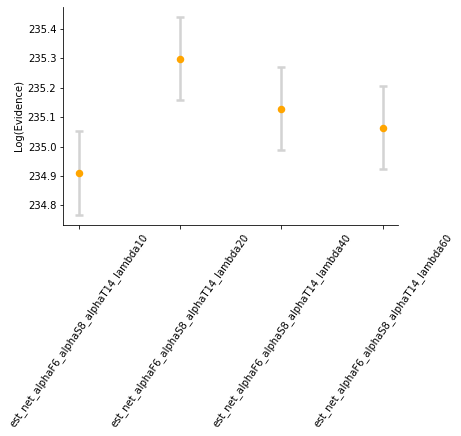

In [98]:
### log evidences of all models
model_selection = res

me.plots.selection_plot(model_selection, est_type='evidence', save='evid.pdf')

[0.2047495  0.30179929 0.25477684 0.23867436]


(0.5, 20.0)

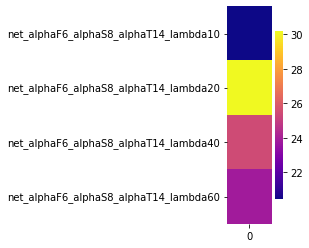

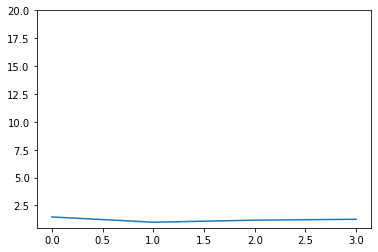

In [97]:
### calculate prob distr over all selected models
# probability for each model (assuming set of models is exhaustive and exclusive! see wiki maybe)
# calculation assumes uniform model prior, i.e. p(M)=1/n (n = number of models)
model_probs = me.selection.compute_model_probabilities(res)
print(model_probs)

plt.figure(figsize=(1,4))
df = pd.DataFrame(np.array([model_probs]).T * 100.0, index=[est.net.net_name for est in res]) # , index=rows
sns.heatmap(df, cmap='plasma', annot=False, fmt='.1f') # annot=True
plt.yticks(rotation=0, va='center')
plt.savefig('./map_model_probs.pdf', bbox_inches='tight')

# also possible: Bayes factors
model_bayes_factors = me.selection.compute_model_bayes_factors(res)
# print(model_bayes_factors)
plt.figure()
plt.plot(range(len(model_bayes_factors)), model_bayes_factors)
plt.ylim(0.5, 20.0)

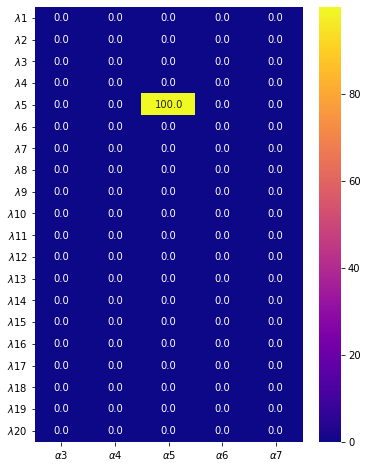

In [9]:
net_names = [est.net.net_name for est in res]
model_probs = me.selection.compute_model_probabilities(res)

steps_list = range(1, 11) # 11, 21

steps_lambda = range(1, 21) # range(1, 21) # [5, 10, 15, 20, 25, 30, 35, 40, 50, 60, 70, 80]
steps_alpha = range(3, 8) # range(4, 8) # [3]
rows = [fr'$\lambda{i}$' for i in steps_lambda] # steps_list # range(1, 21)]
cols = [fr'$\alpha{i}$' for i in steps_alpha] # steps_list # range(1, 6)]

model_probs_2d = np.zeros((len(rows), len(cols)))

for i, row_step in enumerate(rows):
    for j, col_step in enumerate(cols):
        name = f'net_{steps_alpha[j]}_{steps_lambda[i]}'
        net_index = net_names.index(name)
        model_probs_2d[i, j] = model_probs[net_index]

df = pd.DataFrame(model_probs_2d * 100.0, index=rows, columns=cols)

plt.figure(figsize=(6, 8)) # 8, 4 or 6, 8
sns.heatmap(df, cmap='plasma', annot=True, fmt='.1f') # annot=True
plt.yticks(rotation=0, va='center')
plt.savefig('./map_model_probs.pdf')

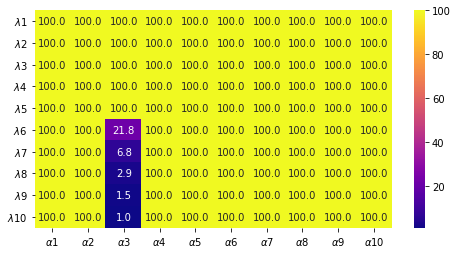

In [79]:
net_names = [est.net.net_name for est in res]
model_bf = me.selection.compute_model_bayes_factors(res)

steps_list = range(1, 11) # 11, 21

rows = [fr'$\lambda{i}$' for i in steps_list]# range(1, 21)]
cols = [fr'$\alpha{i}$' for i in steps_list]# range(1, 6)]

model_bf_2d = np.zeros((len(rows), len(cols)))

for i, row_step in enumerate(rows):
    for j, col_step in enumerate(cols):
        name = f'net_{steps_list[j]}_{steps_list[i]}'
        net_index = net_names.index(name)
        model_bf_2d[i, j] = model_bf[net_index]


# cut-off
model_bf_2d[model_bf_2d > 100.0] = 100.0

df = pd.DataFrame(model_bf_2d, index=rows, columns=cols)

plt.figure(figsize=(8, 4)) # 8, 4
sns.heatmap(df, cmap='plasma', annot=True, fmt='.1f') # annot=True
plt.yticks(rotation=0, va='center')
plt.savefig('./map_model_bfs.pdf')

# from wiki:
# K         Strength of evidence
# 1 to 3.2  Not worth more than a bare mention
# 3.2 to 10 Substantial
# 10 to 100 Strong
# > 100     Decisive

In [10]:
net_names.index('net_5_5')

44

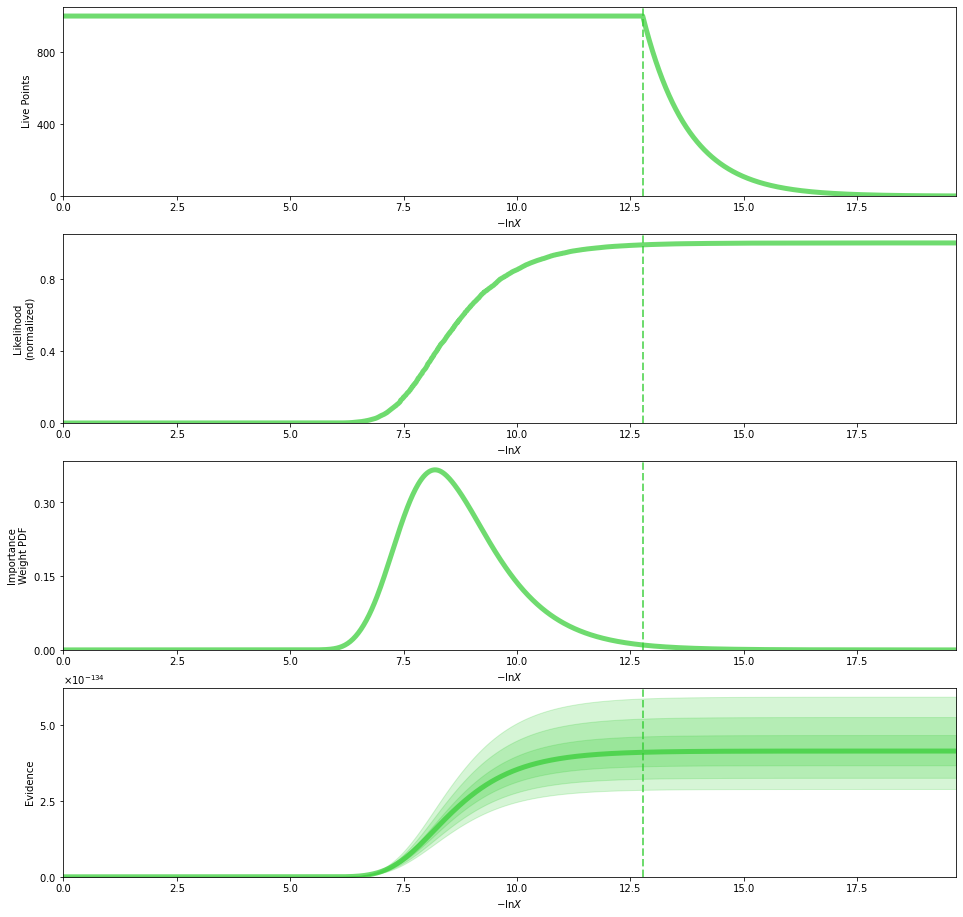

In [4]:
### runplot for an estimation result
est = res[0]
me.plots.est_runplot(est)

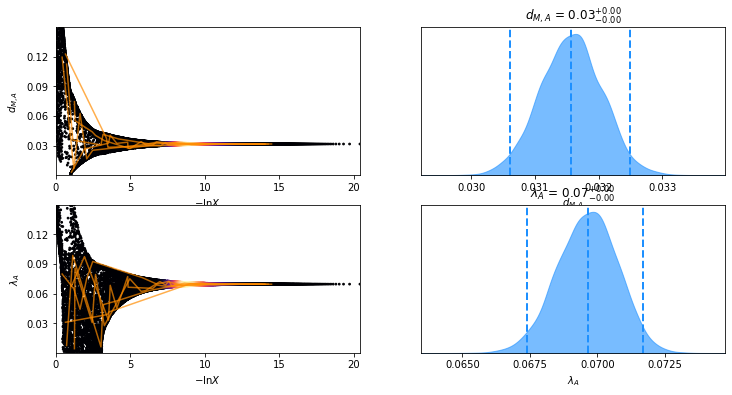

In [7]:
### traceplot for an estimation result
est = res[29]

# plot dynesty runplot
settings = {
    'la_a': {'label': '$\lambda_A$'},
    'd_ma': {'label': '$d_{M,A}$'}
    }
me.plots.est_traceplot(est, settings=settings)

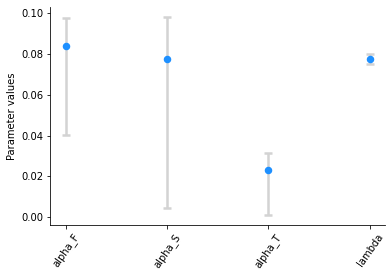

[0.0840359  0.07741768 0.02321846 0.0776792 ]


In [10]:
### plot one-dimensional parameter credible bounds
est = res[3]

settings = {
    'la_a': {'label': '$\lambda_A$', 'color': 'dodgerblue'},
    'd_ma': {'label': '$d_{M,A}$', 'color': 'red'}
    }
me.plots.est_parameter_plot(est) # , settings=settings)

### median and 95% credible intervals of parameter estimates
print(est.bay_est_params_median)
# print(est.bay_est_params_conf)

### actual parameter samples
# print(est.bay_est_samples.shape)
# print(est.bay_est_samples)
# print(est.bay_est_samples_weighted)
# print(est.bay_est_weights)



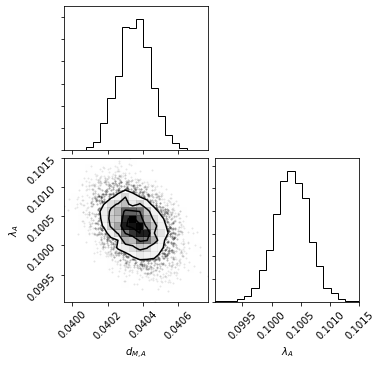

In [122]:
### corner plot
est = res[45]
settings = {
    'la_a': {'label': '$\lambda_A$'},
    'd_ma': {'label': '$d_{M,A}$'}
    }
me.plots.est_corner_plot(est, settings=settings)

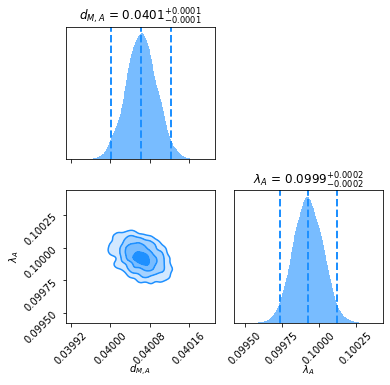

In [11]:
### corner kernel plot
est = res[44]
settings = {
    'la_a': {'label': '$\lambda_A$'},
    'd_ma': {'label': '$d_{M,A}$'}
    }
me.plots.est_corner_kernel_plot(est, settings=settings)

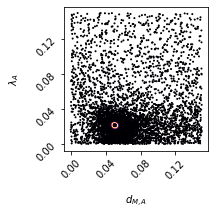

In [5]:
### corner weight plot
est = res[0]
settings = {
    'la_a': {'label': '$\lambda_A$'},
    'd_ma': {'label': '$d_{M,A}$'}
    }
me.plots.est_corner_weight_plot(est, settings=settings)

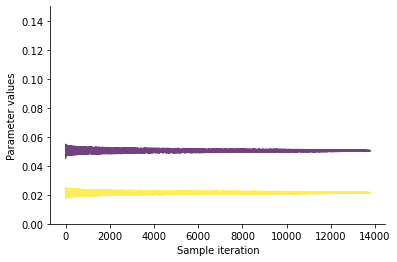

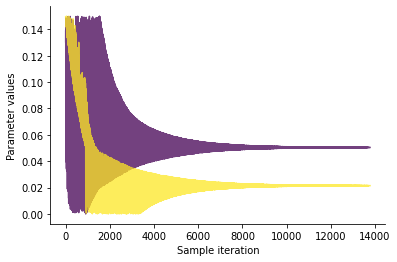

In [6]:
### parameter chains from nested sampling
est = res[0]
me.plots.est_chains_plot(est, y_lim=(0.0, 0.15))
me.plots.est_chains_plot(est, weighted=False)

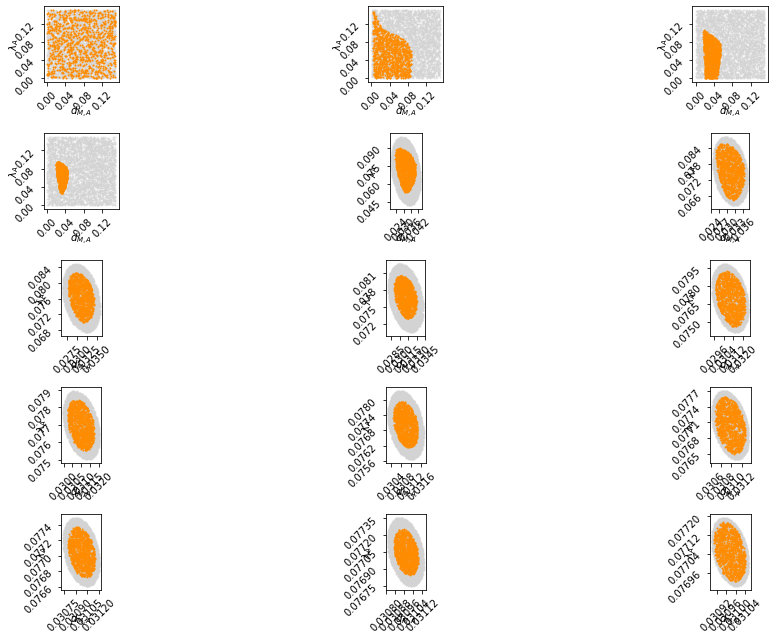

In [10]:
### cornerbounds plots
est = res[-1]
settings = {
    'la_a': {'label': '$\lambda_A$'},
    'd_ma': {'label': '$d_{M,A}$'}
    }
me.plots.est_corner_bounds_plot(est, num_iter=15, settings=settings)

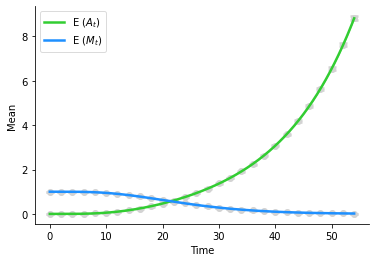

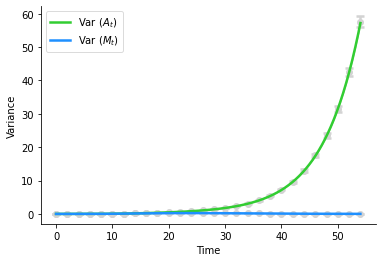

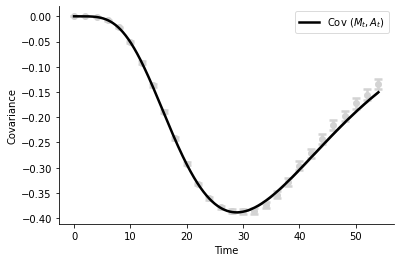

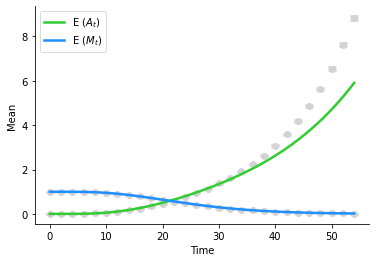

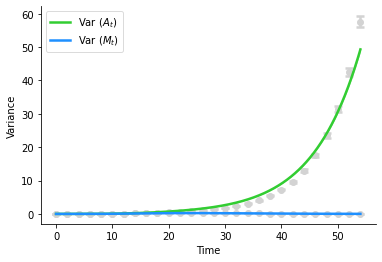

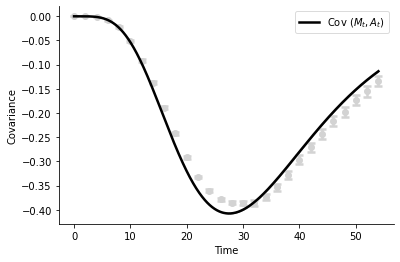

In [12]:
### best-fits model with options for data display and credible bands
est = res[44]

settings = {
    'A_t': {'label': 'E $(A_t)$', 'color': 'limegreen'},
    'M_t': {'label': 'E $(M_t)$', 'color': 'dodgerblue'}
}
me.plots.est_bestfit_mean_plot(est, data=True, conf=True, settings=settings)

settings = {
    ('A_t', 'A_t'): {'label': 'Var $(A_t)$', 'color': 'limegreen'},
    ('M_t', 'M_t'): {'label': 'Var $(M_t)$', 'color': 'dodgerblue'}
}
me.plots.est_bestfit_variance_plot(est, data=True, conf=True, settings=settings)

settings = {
    ('A_t', 'M_t'): {'label': 'Cov $(M_t, A_t)$', 'color': 'black'}
}
me.plots.est_bestfit_covariance_plot(est, data=True, conf=True, settings=settings)


est = res[40]

settings = {
    'A_t': {'label': 'E $(A_t)$', 'color': 'limegreen'},
    'M_t': {'label': 'E $(M_t)$', 'color': 'dodgerblue'}
}
me.plots.est_bestfit_mean_plot(est, data=True, conf=True, settings=settings)

settings = {
    ('A_t', 'A_t'): {'label': 'Var $(A_t)$', 'color': 'limegreen'},
    ('M_t', 'M_t'): {'label': 'Var $(M_t)$', 'color': 'dodgerblue'}
}
me.plots.est_bestfit_variance_plot(est, data=True, conf=True, settings=settings)

settings = {
    ('A_t', 'M_t'): {'label': 'Cov $(M_t, A_t)$', 'color': 'black'}
}
me.plots.est_bestfit_covariance_plot(est, data=True, conf=True, settings=settings)

#### C2 fit a selection of models to the *in silico* data

#### C3 fit a selection of models to the example data

#### D Event times analysis
TODO: add here; simplify plotting interface

In [8]:
import memo_py as me
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pickle
import corner
%matplotlib inline

In [9]:
# load a data object
# can of course also be done with a data object from best-fit model simulations
data = pickle.load(open('count_data_cd44_manual_counting_18_01_14_filtered.pickle', 'rb'))
print(data.data_name)

count_data_cd44_manual_counting_18_01_14_filtered


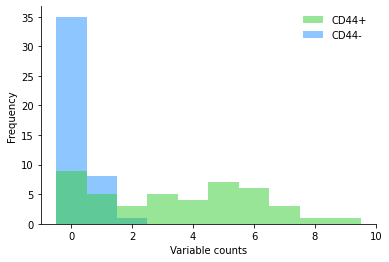

In [3]:
time_index = -1 # last time point
settings = {
    'M_t': {'label': 'CD44-', 'color': 'dodgerblue', 'opacity': 0.5},
    'A_t': {'label': 'CD44+', 'color': 'limegreen', 'opacity': 0.5}
    }
me.plots.data_hist_variables_plot(data, time_index, normalised=False, settings=settings)

gamma_fit_shape:  5.196950480101565 
 gamma_fit_scale:  4.6607045607830955


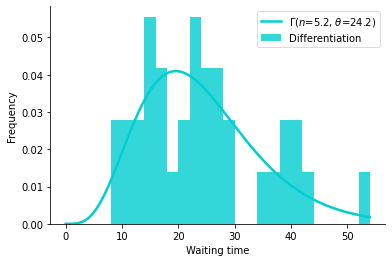

gamma_fit_shape:  2.6335773445484203 
 gamma_fit_scale:  5.014619196040846


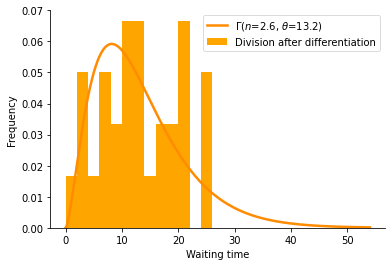

[(True, 30.0),
 (True, 28.0),
 (True, 16.0),
 (False, None),
 (True, 42.0),
 (True, 36.0),
 (False, None),
 (True, 16.0),
 (True, 44.0),
 (True, 26.0),
 (True, 40.0),
 (True, 18.0),
 (True, 28.0),
 (True, 38.0),
 (True, 24.0),
 (True, 12.0),
 (True, 16.0),
 (True, 18.0),
 (False, None),
 (True, 12.0),
 (True, 16.0),
 (False, None),
 (True, 14.0),
 (True, 42.0),
 (False, None),
 (True, 22.0),
 (True, 24.0),
 (True, 40.0),
 (True, 22.0),
 (True, 30.0),
 (True, 54.0),
 (True, 26.0),
 (True, 20.0),
 (True, 10.0),
 (False, None),
 (True, 18.0),
 (True, 10.0),
 (True, 24.0),
 (True, 24.0),
 (False, None),
 (True, 26.0),
 (False, None),
 (True, 14.0),
 (True, 28.0)]

In [13]:
# compute the event analysis
data.events_find_all()

# plot selected event types
settings = {'label': 'Differentiation', 'color': 'darkturquoise', 'opacity': 0.8, 'gamma_color': 'darkturquoise'}
me.plots.data_hist_waiting_times_plot(data, data.event_all_first_cell_type_conversion, 
                                      settings=settings, gamma_fit=True, normalised=True)


settings = {'label': 'Division after differentiation', 'color': 'orange', 'opacity': 1.0, 'gamma_color': 'darkorange'}
me.plots.data_hist_waiting_times_plot(data, data.event_all_first_cell_count_increase_after_cell_type_conversion, 
                                      settings=settings, gamma_fit=True, normalised=False)

data.event_all_first_cell_type_conversion

In [14]:
# overview readout of multiple event types
num_wells = data.data_counts.shape[0]
print(f'percentage wells with first_change_from_inital_conditions = {100 * round(sum([b for b, tau in data.event_all_first_change_from_inital_conditions])/num_wells, 3)}')
print(f'percentage wells with first_cell_count_increase = {100 * round(sum([b for b, tau in data.event_all_first_cell_count_increase])/num_wells, 3)}')
print(f'percentage wells with first_cell_type_conversion = {100 * round(sum([b for b, tau in data.event_all_first_cell_type_conversion])/num_wells, 3)}')
print(f'percentage wells with first_cell_count_increase_after_cell_type_conversion = {100 * round(sum([b for b, tau in data.event_all_first_cell_count_increase_after_cell_type_conversion])/num_wells, 3)}')
print(f'percentage wells with second_cell_count_increase_after_first_cell_count_increase_after_cell_type_conversion = {100 * round(sum([b for b, tau in data.event_all_second_cell_count_increase_after_first_cell_count_increase_after_cell_type_conversion])/num_wells, 3)}')
print(f'percentage wells with third_cell_count_increase_after_first_and_second_cell_count_increase_after_cell_type_conversion = {100 * round(sum([b for b, tau in data.event_all_third_cell_count_increase_after_first_and_second_cell_count_increase_after_cell_type_conversion])/num_wells, 3)}')

print(f'one well percentage difference = {100 * round(1.0/num_wells, 3)}')

percentage wells with first_change_from_inital_conditions = 84.1
percentage wells with first_cell_count_increase = 70.5
percentage wells with first_cell_type_conversion = 81.8
percentage wells with first_cell_count_increase_after_cell_type_conversion = 68.2
percentage wells with second_cell_count_increase_after_first_cell_count_increase_after_cell_type_conversion = 61.4
percentage wells with third_cell_count_increase_after_first_and_second_cell_count_increase_after_cell_type_conversion = 45.5
one well percentage difference = 2.3


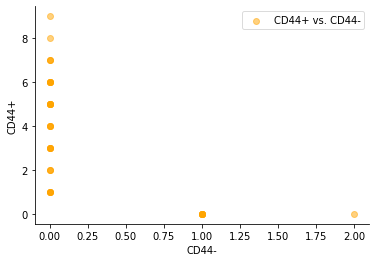

54.0

In [11]:
# various: small wrapper for a scatter plot of variable counts
variable1 = 'M_t'
variable2 = 'A_t'
time_ind = -1
settings = {'color': 'orange', 'opacity': 0.5, 'label': 'CD44+ vs. CD44-'}

me.plots.data_variable_scatter_plot(data, time_ind, variable1, variable2, 
                                    x_label='CD44-', y_label='CD44+', settings=settings)

data.data_time_values[time_ind]

#### E Various notes

In [1]:
import memo_py as me
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pickle
import corner
%matplotlib inline

/Users/m651s/opt/anaconda3/envs/cd44_project/lib/python3.7/site-packages/tqdm/autonotebook.py:17: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [31]:
### load in silico estimation with pickle
res_min = pickle.load(open('estimation_count_data_cd44_filtered_thin4.pickle', 'rb')) # in_silico_estimation
# print(res)

min_model_net_names = [est.net.net_name for est in res_min]
min_model_model_probs = me.selection.compute_model_probabilities(res_min)
min_model_model_logevids = [est.bay_est_log_evidence for est in res_min]

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]),
 <a list of 10 Text major ticklabel objects>)

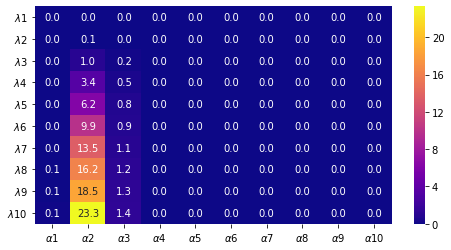

In [4]:
steps_list = range(1, 11)

rows = [fr'$\lambda{i}$' for i in steps_list]
cols = [fr'$\alpha{i}$' for i in steps_list]

model_probs_2d = np.zeros((len(rows), len(cols)))

for i, row_step in enumerate(rows):
    for j, col_step in enumerate(cols):
        name = f'net_{steps_list[j]}_{steps_list[i]}'
        net_index = net_names.index(name)
        model_probs_2d[i, j] = model_probs[net_index]

df = pd.DataFrame(model_probs_2d * 100.0, index=rows, columns=cols)

plt.figure(figsize=(8, 4))
sns.heatmap(df, cmap='plasma', annot=True, fmt='.1f') # annot=True
plt.yticks(rotation=0, va='center')

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]),
 <a list of 10 Text major ticklabel objects>)

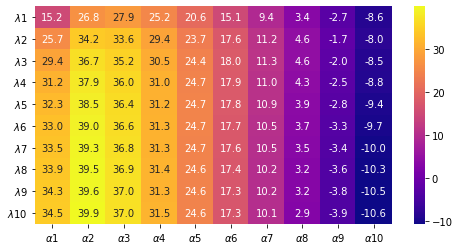

In [8]:
steps_list = range(1, 11)

rows = [fr'$\lambda{i}$' for i in steps_list]
cols = [fr'$\alpha{i}$' for i in steps_list]

model_logevids_2d = np.zeros((len(rows), len(cols)))

for i, row_step in enumerate(rows):
    for j, col_step in enumerate(cols):
        name = f'net_{steps_list[j]}_{steps_list[i]}'
        net_index = net_names.index(name)
        model_logevids_2d[i, j] = model_logevids[net_index]

df = pd.DataFrame(model_logevids_2d, index=rows, columns=cols)

plt.figure(figsize=(8, 4))
sns.heatmap(df, cmap='plasma', annot=True, fmt='.1f') # annot=True
plt.yticks(rotation=0, va='center')

In [5]:
net_names.index('net_2_10')

19

In [10]:
model_logevids[19]

39.862482254002536

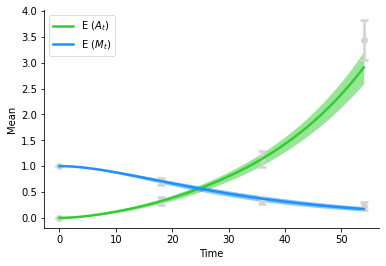

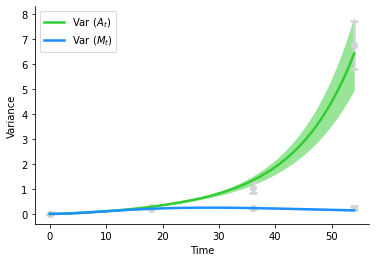

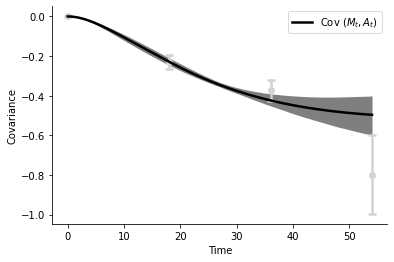

In [6]:
### best-fits model with options for data display and credible bands
est = res[19]

settings = {
    'A_t': {'label': 'E $(A_t)$', 'color': 'limegreen'},
    'M_t': {'label': 'E $(M_t)$', 'color': 'dodgerblue'}
}
me.plots.est_bestfit_mean_plot(est, data=True, conf=True, settings=settings)

settings = {
    ('A_t', 'A_t'): {'label': 'Var $(A_t)$', 'color': 'limegreen'},
    ('M_t', 'M_t'): {'label': 'Var $(M_t)$', 'color': 'dodgerblue'}
}
me.plots.est_bestfit_variance_plot(est, data=True, conf=True, settings=settings)

settings = {
    ('A_t', 'M_t'): {'label': 'Cov $(M_t, A_t)$', 'color': 'black'}
}
me.plots.est_bestfit_covariance_plot(est, data=True, conf=True, settings=settings)

In [2]:
### load in silico estimation with pickle
res = pickle.load(open('estimation_count_data_cd44_filtered_thin4_par3.pickle', 'rb')) # in_silico_estimation
# print(res)

net_names = [est.net.net_name for est in res]
model_probs = me.selection.compute_model_probabilities(res)
model_bfs = me.selection.compute_model_bayes_factors(res)
model_logevids = [est.bay_est_log_evidence for est in res]

In [3]:
print(model_logevids.index(max(model_logevids)))
max(model_logevids)

370


42.13480758579131

In [18]:
model_logevids[370]

42.13480758579131

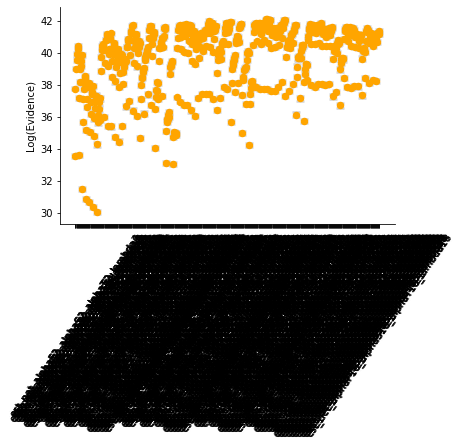

In [25]:
me.plots.selection_plot(res, est_type='evidence')

In [4]:
for name, logevid in zip(net_names, model_logevids):
    if logevid > 42.0:
        print(name, '\t',logevid)

net_alphaF6_alphaS6_alphaT14_lambda14 	 42.078268757135895
net_alphaF6_alphaS6_alphaT14_lambda18 	 42.13480758579131
net_alphaF6_alphaS6_alphaT18_lambda14 	 42.07068620414759
net_alphaF6_alphaS6_alphaT18_lambda18 	 42.02149160983367
net_alphaF6_alphaS8_alphaT18_lambda14 	 42.023850619426945
net_alphaF6_alphaS8_alphaT18_lambda18 	 42.06231989177437


In [83]:
# for name, bf in zip(net_names, model_bfs):
#     if bf < 3.2:
#         print(name, '\t', bf)

In [29]:
net_names.index('net_alphaF6_alphaS8_alphaT18_lambda18')

405

In [113]:
net_names.index('net_alphaF10_alphaS14_alphaT18_lambda8')

549

In [115]:
model_logevids[549]
model_bfs[549]

2.7611208131541294

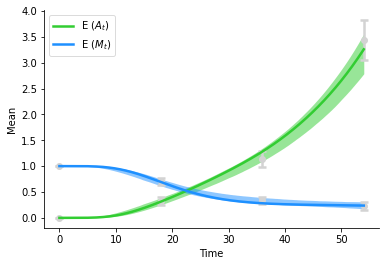

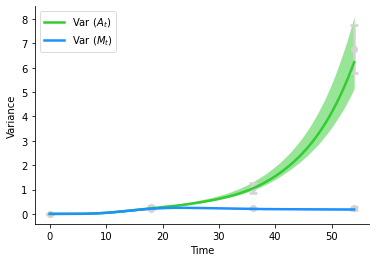

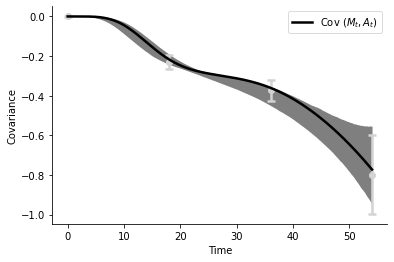

In [5]:
### best-fits model with options for data display and credible bands
est = res[405]

settings = {
    'A_t': {'label': 'E $(A_t)$', 'color': 'limegreen'},
    'M_t': {'label': 'E $(M_t)$', 'color': 'dodgerblue'}
}
me.plots.est_bestfit_mean_plot(est, data=True, conf=True, settings=settings, save='est_par3_thin4_data_net_alphaF6_alphaS8_alphaT18_lambda18_mean.pdf')

settings = {
    ('A_t', 'A_t'): {'label': 'Var $(A_t)$', 'color': 'limegreen'},
    ('M_t', 'M_t'): {'label': 'Var $(M_t)$', 'color': 'dodgerblue'}
}
me.plots.est_bestfit_variance_plot(est, data=True, conf=True, settings=settings, save='est_par3_thin4_data_net_alphaF6_alphaS8_alphaT18_lambda18_var.pdf')

settings = {
    ('A_t', 'M_t'): {'label': 'Cov $(M_t, A_t)$', 'color': 'black'}
}
me.plots.est_bestfit_covariance_plot(est, data=True, conf=True, settings=settings, save='est_par3_thin4_data_net_alphaF6_alphaS8_alphaT18_lambda18_cov.pdf')

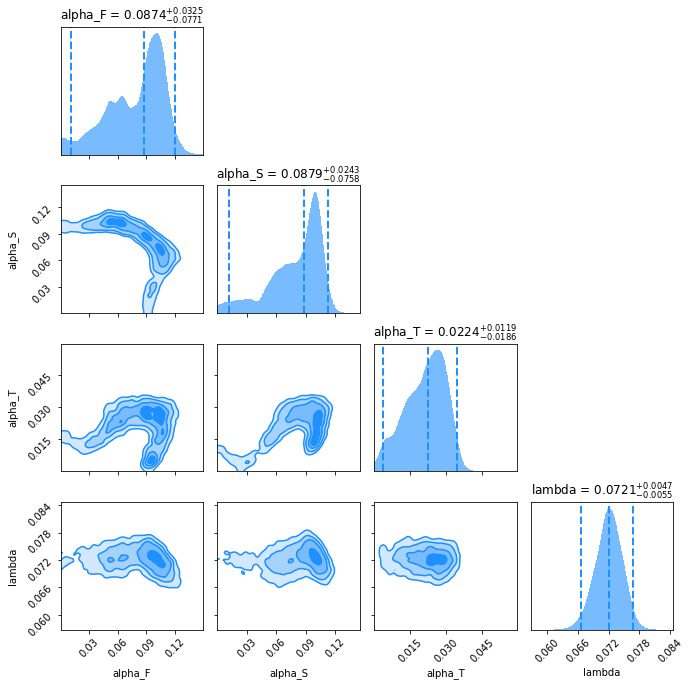

In [6]:
est = res[405]

me.plots.est_corner_kernel_plot(est, save='est_par3_thin4_data_net_alphaF6_alphaS8_alphaT18_lambda18_cornerkernel.pdf')

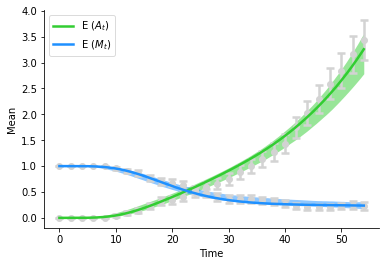

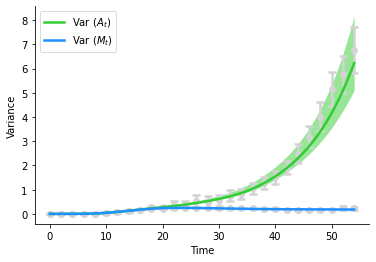

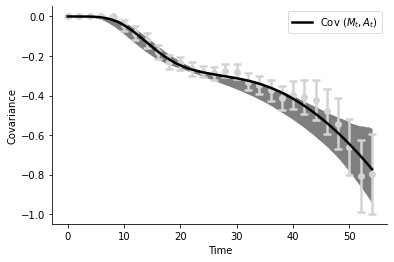

In [98]:
# a small hack to plot thin4 model on top of all data
import copy
est_hack = copy.deepcopy(res[405])
est_full_data = copy.deepcopy(res_full_data[549])
# overwrite data with data from full data estimation
est_hack.data = est_full_data.data
est_hack.data_time_values = est_full_data.data_time_values
est_hack.data_mean_values = est_full_data.data_mean_values
est_hack.data_var_values = est_full_data.data_var_values
est_hack.data_cov_values = est_full_data.data_cov_values
est_hack.data_num_values = est_full_data.data_num_values
est_hack.data_time_values_dense = est_full_data.data_time_values_dense

settings = {
    'A_t': {'label': 'E $(A_t)$', 'color': 'limegreen'},
    'M_t': {'label': 'E $(M_t)$', 'color': 'dodgerblue'}
}
me.plots.est_bestfit_mean_plot(est_hack, data=True, conf=True, settings=settings, save='est_par3_thin4_data_net_alphaF6_alphaS8_alphaT18_lambda18_mean_hack.pdf')

settings = {
    ('A_t', 'A_t'): {'label': 'Var $(A_t)$', 'color': 'limegreen'},
    ('M_t', 'M_t'): {'label': 'Var $(M_t)$', 'color': 'dodgerblue'}
}
me.plots.est_bestfit_variance_plot(est_hack, data=True, conf=True, settings=settings, save='est_par3_thin4_data_net_alphaF6_alphaS8_alphaT18_lambda18_var_hack.pdf')

settings = {
    ('A_t', 'M_t'): {'label': 'Cov $(M_t, A_t)$', 'color': 'black'}
}
me.plots.est_bestfit_covariance_plot(est_hack, data=True, conf=True, settings=settings, save='est_par3_thin4_data_net_alphaF6_alphaS8_alphaT18_lambda18_cov_hack.pdf')

In [33]:
res_best_of = [res_min[19], res[405]]
print(me.selection.compute_model_probabilities(res_best_of))
print(me.selection.compute_model_bayes_factors(res_best_of))
[(est.bay_est_log_evidence, est.bay_est_log_evidence_error) for est in res_best_of]


[0.09976507 0.90023493]
[9.0235483 1.       ]


[(39.862482254002536, 0.11058761305265391),
 (42.06231989177437, 0.11924196619722403)]

In [7]:
# res_full_data = pickle.load(open('../../env_analysis/03a_selection_res/DYNnlive1000_tol0p01_boundmulti_sampleunif_DATAcount_data_cd44_manual_counting_18_01_14_filtered_MODELSpar3Model_combSteps2to18gapsSparse_bounds0p15.pickle', 'rb'))
res_full_data = pickle.load(open('estimation_count_data_cd44_filtered_sigma022_par3.pickle', 'rb'))


In [8]:
full_model_net_names = [est.net.net_name for est in res_full_data]
full_model_model_probs = me.selection.compute_model_probabilities(res_full_data)
full_model_model_logevids = [est.bay_est_log_evidence for est in res_full_data]

In [9]:
print(full_model_model_logevids.index(max(full_model_model_logevids)))
max(full_model_model_logevids)

348


235.88771464915

In [12]:
for name, logevid in zip(full_model_net_names, full_model_model_logevids):
    if logevid > 235.5: # 292.0:
        print(name, '\t',logevid)

net_alphaF4_alphaS6_alphaT6_lambda18 	 235.6161915698925
net_alphaF6_alphaS6_alphaT6_lambda10 	 235.5303575767128
net_alphaF6_alphaS6_alphaT6_lambda14 	 235.88771464915
net_alphaF6_alphaS6_alphaT6_lambda18 	 235.7986712420933
net_alphaF6_alphaS6_alphaT14_lambda14 	 235.56732529582533
net_alphaF6_alphaS6_alphaT18_lambda18 	 235.5434805195489
net_alphaF6_alphaS8_alphaT14_lambda14 	 235.50951620423467
net_alphaF8_alphaS8_alphaT18_lambda14 	 235.6722507085798
net_alphaF8_alphaS8_alphaT18_lambda18 	 235.56980755012884


In [13]:
full_model_net_names.index('net_alphaF6_alphaS8_alphaT14_lambda14')

397

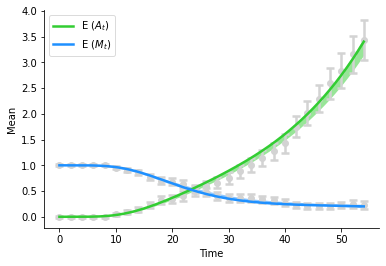

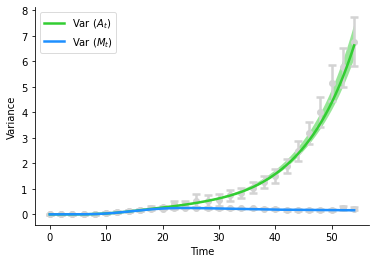

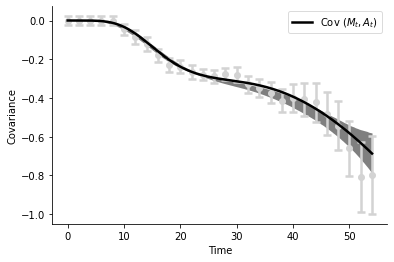

In [14]:
est = res_full_data[397] # 549

settings = {
    'A_t': {'label': 'E $(A_t)$', 'color': 'limegreen'},
    'M_t': {'label': 'E $(M_t)$', 'color': 'dodgerblue'}
}
me.plots.est_bestfit_mean_plot(est, data=True, conf=True, settings=settings, save='est_par3_full_data_net_alphaF6_alphaS8_alphaT14_lambda14_mean.pdf')

settings = {
    ('A_t', 'A_t'): {'label': 'Var $(A_t)$', 'color': 'limegreen'},
    ('M_t', 'M_t'): {'label': 'Var $(M_t)$', 'color': 'dodgerblue'}
}
me.plots.est_bestfit_variance_plot(est, data=True, conf=True, settings=settings, save='est_par3_full_data_net_alphaF6_alphaS8_alphaT14_lambda14_var.pdf')

settings = {
    ('A_t', 'M_t'): {'label': 'Cov $(M_t, A_t)$', 'color': 'black'}
}
me.plots.est_bestfit_covariance_plot(est, data=True, conf=True, settings=settings, save='est_par3_full_data_net_alphaF6_alphaS8_alphaT14_lambda14_cov.pdf')

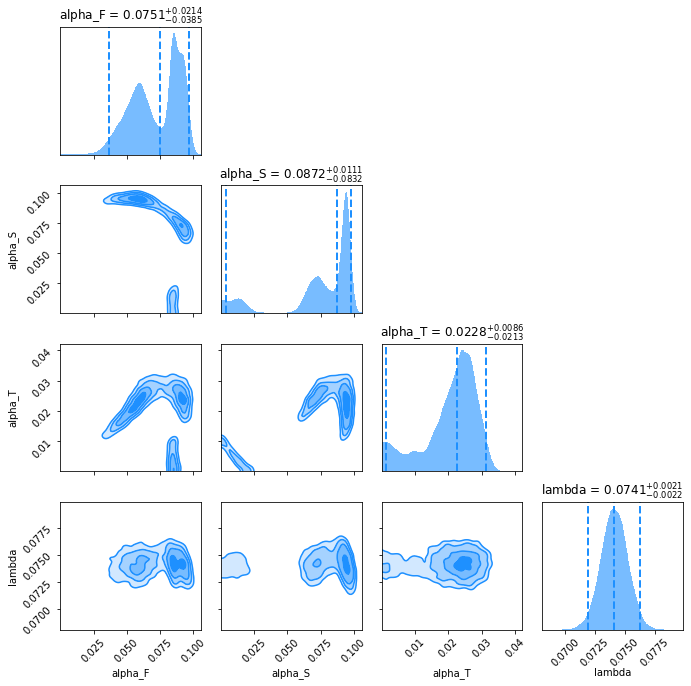

In [15]:
est = res_full_data[397]

me.plots.est_corner_kernel_plot(est, save='est_par3_full_data_net_alphaF6_alphaS8_alphaT14_lambda14_cornerkernel.pdf')

In [37]:
full_model_net_names == net_names

True

0.7115434656227986

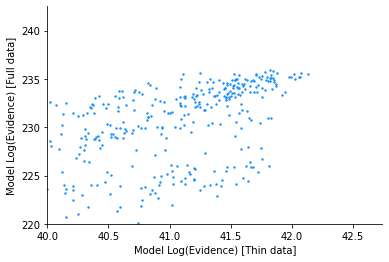

In [19]:
plt.figure()
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
plt.scatter(model_logevids, full_model_model_logevids, color='dodgerblue', s=2.0)
plt.xlabel('Model Log(Evidence) [Thin data]')
plt.ylabel('Model Log(Evidence) [Full data]')
plt.xlim((40, None))
plt.ylim((220, None))
plt.savefig('./evidence_corr_thin_vs_full_data_par3_models.pdf')

np.corrcoef(model_logevids, full_model_model_logevids)[0, 1]
# 0.17693293555336875


0.1204169152012141

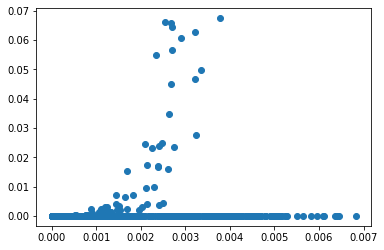

In [52]:
plt.scatter(model_probs, full_model_model_probs)
np.corrcoef(model_probs, full_model_model_probs)[0, 1]

(array([561.,   4.,   5.,   5.,   1.,   1.,   2.,   1.,   3.,   5.]),
 array([0.        , 0.00674974, 0.01349948, 0.02024922, 0.02699896,
        0.0337487 , 0.04049844, 0.04724818, 0.05399792, 0.06074766,
        0.0674974 ]),
 <a list of 10 Patch objects>)

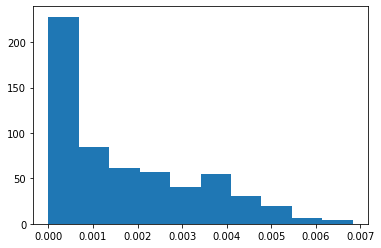

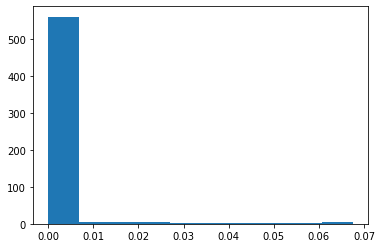

In [45]:
plt.figure()
plt.hist(model_probs)

plt.figure()
plt.hist(full_model_model_probs)

(array([  7.,   0.,   0.,   0.,   0.,   0.,   0.,  28.,  35., 518.]),
 array([-1559.75828647, -1374.44139885, -1189.12451122, -1003.80762359,
         -818.49073596,  -633.17384833,  -447.8569607 ,  -262.54007307,
          -77.22318544,   108.09370219,   293.41058982]),
 <a list of 10 Patch objects>)

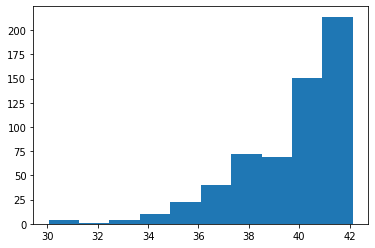

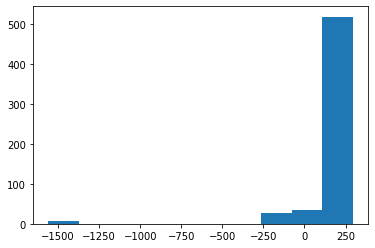

In [47]:
plt.figure()
plt.hist(model_logevids)

plt.figure()
plt.hist(full_model_model_logevids)

588
True


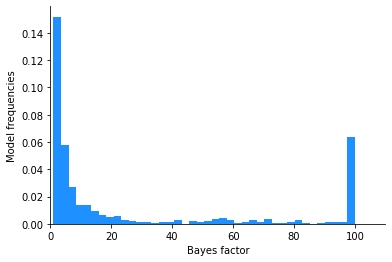

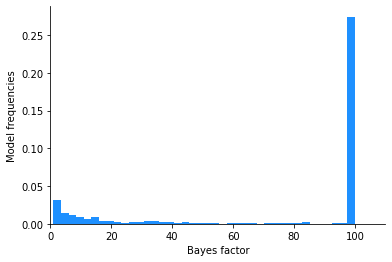

In [20]:
print(len(res))
print(len(res)==len(res_full_data))

bf = me.selection.compute_model_bayes_factors(res)
bf[bf > 100.0] = 100.0
plt.figure()
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
plt.xlim((0, 110))
plt.hist(bf, bins=40, density=True, color='dodgerblue')
plt.xlabel('Bayes factor')
plt.ylabel('Model frequencies')
plt.savefig('./bayesfactors_thin_data_par3_models.pdf')

bf = me.selection.compute_model_bayes_factors(res_full_data)
bf[bf > 100.0] = 100.0
plt.figure()
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
plt.xlim((0, 110))
plt.hist(bf, bins=40, density=True, color='dodgerblue')
plt.xlabel('Bayes factor')
plt.ylabel('Model frequencies')
plt.savefig('./bayesfactors_full_data_par3_models.pdf')

In [21]:
bf = me.selection.compute_model_bayes_factors(res)
bf_full = me.selection.compute_model_bayes_factors(res_full_data)

In [33]:
sum(bf_full < 20)

128

In [34]:
sum(bf < 20)

411

In [49]:
bf[bf_full < 10.0] < 10.0

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

0.39668033457224483

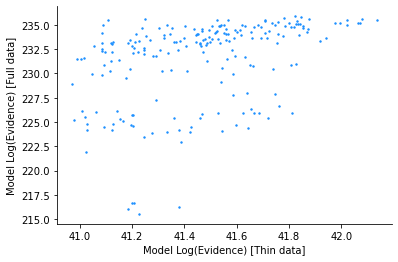

In [43]:
plt.figure()
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
plt.scatter(np.array(model_logevids)[bf < 3.2], np.array(full_model_model_logevids)[bf < 3.2], color='dodgerblue', s=2.0)
plt.xlabel('Model Log(Evidence) [Thin data]')
plt.ylabel('Model Log(Evidence) [Full data]')
# plt.xlim((40, None))
# plt.ylim((220, None))
plt.savefig('./evidence_corr_thin_vs_full_data_par3_models_selection.pdf')

np.corrcoef(np.array(model_logevids)[bf < 3.2], np.array(full_model_model_logevids)[bf < 3.2])[0, 1]

In [99]:
### load in silico estimation with pickle
res_1plusi = pickle.load(open('estimation_count_data_cd44_filtered_thin4_par1+i.pickle', 'rb')) # in_silico_estimation
# print(res)

net_names_1plusi = [est.net.net_name for est in res_1plusi]
model_probs_1plusi = me.selection.compute_model_probabilities(res_1plusi)
model_bfs_1plusi = me.selection.compute_model_bayes_factors(res_1plusi)
model_logevids_1plusi = [est.bay_est_log_evidence for est in res_1plusi]

In [100]:
model_logevids_1plusi

[31.5710683534454,
 35.632683563608815,
 36.92011348008265,
 37.501218295324065,
 37.83729571408179,
 38.19767668819837,
 38.37914098541798,
 35.94907012811707,
 39.112854585934755,
 39.860244697174025,
 40.25728726582936,
 40.35727338393802,
 40.57683357486161,
 40.61380790279041,
 36.704578546568534,
 39.35707661414869,
 40.04064616961045,
 40.141826356075725,
 40.53185125868625,
 40.43440839730646,
 40.49793687159961,
 36.913003603775955,
 39.20921490261244,
 39.763964453543636,
 40.12509618072463,
 40.18301654374779,
 40.218238523453756,
 40.14258970755334,
 36.7457491694761,
 39.253817649806756,
 39.52307300011537,
 39.71852595148961,
 39.88371224591806,
 40.0110200070305,
 39.732809033509,
 36.726057122428,
 38.94371554497594,
 39.39332394628561,
 39.49648873120336,
 39.36884692149565,
 39.280390273069315,
 39.38622826684621,
 36.784226173098624,
 38.87749839752808,
 39.34252787891213,
 39.23103728568773,
 39.16254365945645,
 39.07483848207364,
 39.01593768635132]

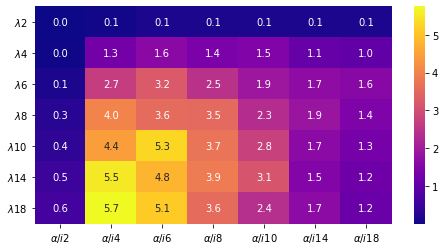

In [109]:
steps_list = [2, 4, 6, 8, 10, 14, 18]

rows = [fr'$\lambda{i}$' for i in steps_list]
cols = [fr'$\alpha/i{i}$' for i in steps_list]

model_probs_2d = np.zeros((len(rows), len(cols)))

for i, row_step in enumerate(rows):
    for j, col_step in enumerate(cols):
        name = f'net_{steps_list[j]}_{steps_list[i]}'
        net_index = net_names_1plusi.index(name)
        model_probs_2d[i, j] = model_probs_1plusi[net_index]

df = pd.DataFrame(model_probs_2d * 100.0, index=rows, columns=cols)

plt.figure(figsize=(8, 4))
sns.heatmap(df, cmap='plasma', annot=True, fmt='.1f') # annot=True
plt.yticks(rotation=0, va='center')
plt.savefig('./prob_map_par1+i_thin4_data.pdf')

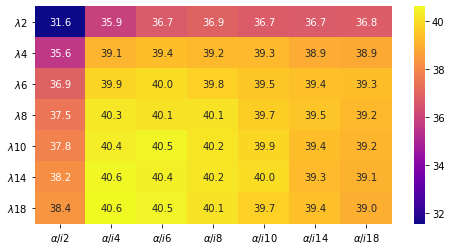

In [111]:
rows = [fr'$\lambda{i}$' for i in steps_list]
cols = [fr'$\alpha/i{i}$' for i in steps_list]

model_logevids_2d = np.zeros((len(rows), len(cols)))

for i, row_step in enumerate(rows):
    for j, col_step in enumerate(cols):
        name = f'net_{steps_list[j]}_{steps_list[i]}'
        net_index = net_names_1plusi.index(name)
        model_logevids_2d[i, j] = model_logevids_1plusi[net_index]

df = pd.DataFrame(model_logevids_2d, index=rows, columns=cols)

plt.figure(figsize=(8, 4))
sns.heatmap(df, cmap='plasma', annot=True, fmt='.1f') # annot=True
plt.yticks(rotation=0, va='center')
plt.savefig('./logevid_map_par1+i_thin4_data.pdf')

In [103]:
print(model_logevids_1plusi.index(max(model_logevids_1plusi)))
max(model_logevids_1plusi)

13


40.61380790279041

In [104]:
net_names_1plusi.index('net_4_18')

13

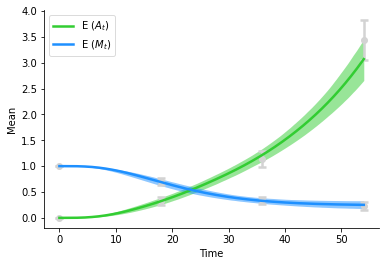

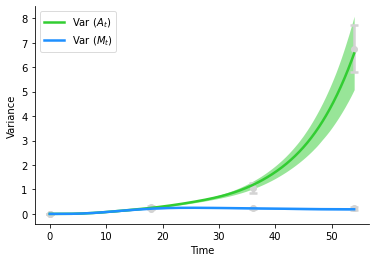

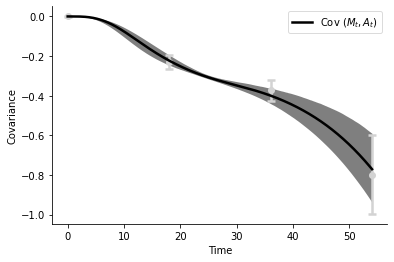

In [105]:
est = res_1plusi[13]

settings = {
    'A_t': {'label': 'E $(A_t)$', 'color': 'limegreen'},
    'M_t': {'label': 'E $(M_t)$', 'color': 'dodgerblue'}
}
me.plots.est_bestfit_mean_plot(est, data=True, conf=True, settings=settings, save='est_par1+i_thin4_data_net_4_18_mean.pdf')

settings = {
    ('A_t', 'A_t'): {'label': 'Var $(A_t)$', 'color': 'limegreen'},
    ('M_t', 'M_t'): {'label': 'Var $(M_t)$', 'color': 'dodgerblue'}
}
me.plots.est_bestfit_variance_plot(est, data=True, conf=True, settings=settings, save='est_par1+i_thin4_data_net_4_18_var.pdf')

settings = {
    ('A_t', 'M_t'): {'label': 'Cov $(M_t, A_t)$', 'color': 'black'}
}
me.plots.est_bestfit_covariance_plot(est, data=True, conf=True, settings=settings, save='est_par1+i_thin4_data_net_4_18_cov.pdf')

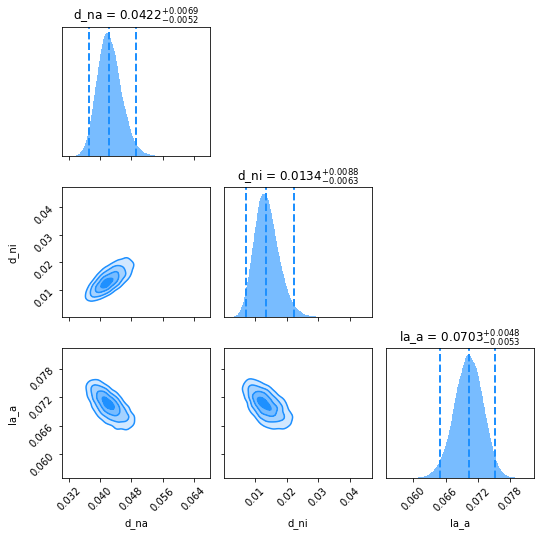

In [106]:
est = res_1plusi[13]

me.plots.est_corner_kernel_plot(est, save='est_par1+i_thin4_data_net_4_18_cornerkernel.pdf')

In [112]:
res_best_of = [res_min[19], res[405], res_1plusi[13]]
print(me.selection.compute_model_probabilities(res_best_of))
print(me.selection.compute_model_bayes_factors(res_best_of))
[(est.bay_est_log_evidence, est.bay_est_log_evidence_error) for est in res_best_of]

[0.08234955 0.74308518 0.17456527]
[9.0235483  1.         4.25677567]


[(39.862482254002536, 0.11058761305265391),
 (42.06231989177437, 0.11924196619722403),
 (40.61380790279041, 0.1304595397741054)]

#### F Various notes: Calculating basic_sigma correction for CD44 data

After some more random wikipedia reads, I actually found references:

- https://en.wikipedia.org/wiki/Rule_of_succession
- https://en.wikipedia.org/wiki/Additive_smoothing

(and possibly more reference/articles list therein).


The problem gets nicely introduced as:

"In probability theory, the rule of succession is a formula introduced in the 18th century by Pierre-Simon Laplace in the course of treating the sunrise problem.[1]

The formula is still used, particularly to estimate underlying probabilities when there are few observations, or for events that have not been observed to occur at all in (finite) sample data.

If we repeat an experiment that we know can result in a success or failure, $n$ times independently, and get $s$ successes, and $n-s$ failures, then what is the probability that the next repetition will succeed?

More abstractly: If $X_{1}, ..., X_{n+1}$ are conditionally independent random variables that each can assume the value 0 or 1, then, if we know nothing more about them, 

$P(X_{n+1}=1 \, | \, X_1 + ... + X_n = s) = \frac{s+1}{n+2}$."

In our case, we have $n=44$ and no activated cells seen yet (lets set that as successes $s=0$). So we set the pseudocounts as activated cells = s+1 = 1 and total cells = n+2 = 44. Based on this (see below), we get standard errors of mean, var and cov equal to 0.0215, 0.0205 and 0.0205, respectively. So we use value 0.022 as a round-off conservative minimal standard error for all of them.

All this corresponds also to additive smoothing
$p_i = \frac{x_i}{N}$ (empirical) vs. $p_i = \frac{x_i + \alpha}{N + \alpha d}$ (smoothed). With $d=2$ (two outcome categories), we have $p_i = \frac{0}{44} = 0$ and $p_i = \frac{0+1}{44 + 2} = \frac{1}{46} = 0.0217$.


In [1]:
# calculation of sigma correction
import math

p = 1/46.0 # p=(s+1)/(n+2), s+1=1 # 4.0/5.0 # 0.95
N = 46 # N=44+2 # 5.0 # 44.0
print(p, N)

exp = p
var = p * (1-p)
print(exp, var)

mu4 = (1-p) * p**4 + p * (1-p)**4
sigma4 = var*var
print(mu4, sigma4)

0.021739130434782608 46
0.021739130434782608 0.021266540642722116
0.019909743389996463 0.0004522657509085516


In [2]:
se_sample_mean = math.sqrt(var/N)
print(se_sample_mean)

se_sample_var = math.sqrt((1/N) * (mu4 - ((N-3)/(N-1)) * sigma4))
print(se_sample_var)

se_sample_cov = math.sqrt( ((N-1)**2/(N**3)) * (mu4 - sigma4)   +   ((N-1)/(N**3)) * 2 * sigma4 )
print(se_sample_cov)

se_sample_cov_corr = math.sqrt( (N/(N-1))**2 * (  ((N-1)**2/(N**3)) * (mu4 - sigma4)   +   ((N-1)/(N**3)) * 2 * sigma4 ) )
print(se_sample_cov_corr)

0.021501537175949575
0.020577308280433724
0.020129975491728645
0.020577308280433724


(46, 2, 1)


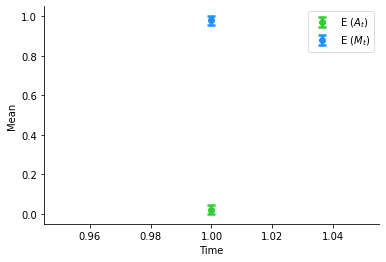

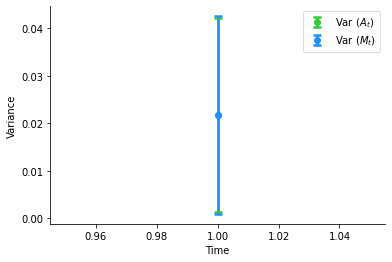

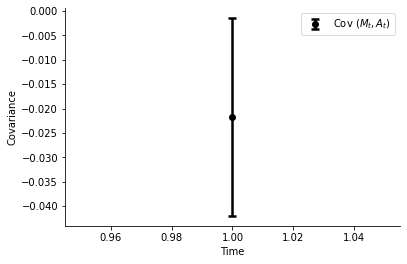

[[[0.02173913]
  [0.97826087]]

 [[0.02142676]
  [0.02146344]]]
[[[0.02173913]
  [0.02173913]]

 [[0.02040098]
  [0.02079332]]]
[[[-0.02173913]]

 [[ 0.02026167]]]


In [5]:
N = 46
sigma_counts = np.zeros((N, 2, 1))

# add N-1 "normal wells"
for i in range(N-1):
    sigma_counts[i, :, 0] = np.array([0.0, 1.0])

# add Nth well with switched cell types
sigma_counts[N-1, :, 0] = np.array([1.0, 0.0])

# # add also second to last switched
# sigma_counts[N-2, :, 0] = np.array([1.0, 0.0])

print(sigma_counts.shape)
# print(sigma_counts)

### creation of a new data object
data_name = 'bootstrap_sigma'

data_input = {
    # general settings
    'variables': ['A_t', 'M_t'], # indices here are matched to indices of data
    'data_type': 'counts', # 'summary' or 'counts'
    
    # time points
    'time_values': np.array([1.0]), # shape (# time_values, )
    
    # if data_type 'summary'
    'mean_data': np.array([]), # shape (2, # variables, # time_values)
    'var_data': np.array([]), # variance, shape (2, # variables, # time_values)
    'cov_data': np.array([]), # covariance, shape (2, # variables, # time_values)
    
    # if data_type 'counts'
    'count_data': sigma_counts, # shape (# number of simulations, # variables, # time_values)
    'bootstrap_samples': 10000, # 100000
    
    # handling of standard errors that are zero
    # all standard errors <= basic_sigma, will be set to basic_sigma
    'basic_sigma': 0.0 # 0.01, 0.001
}

data = me.Data(data_name)
data.load(data_input)

### plotting
# mean
settings = {
    'A_t': {'label': 'E $(A_t)$', 'color': 'limegreen'},
    'M_t': {'label': 'E $(M_t)$', 'color': 'dodgerblue'}
}
me.plots.data_mean_plot(data, settings=settings)

# var
settings = {
    ('A_t', 'A_t'): {'label': 'Var $(A_t)$', 'color': 'limegreen'},
    ('M_t', 'M_t'): {'label': 'Var $(M_t)$', 'color': 'dodgerblue'}
}
me.plots.data_variance_plot(data, settings=settings)

# cov
settings = {
    ('M_t', 'A_t'): {'label': 'Cov $(M_t, A_t)$', 'color': 'black'}
}
me.plots.data_covariance_plot(data, settings=settings)

print(data.data_mean)
print(data.data_variance)
print(data.data_covariance)

In [138]:
in_silico_counts

array([[[ 0.,  0.,  0., ..., 21., 25., 28.],
        [ 1.,  1.,  1., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 16., 18., 21.],
        [ 1.,  1.,  1., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  4.,  5.,  6.],
        [ 1.,  1.,  1., ...,  0.,  0.,  0.]],

       ...,

       [[ 0.,  0.,  0., ..., 11., 12., 14.],
        [ 1.,  1.,  1., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  7.,  7.,  7.],
        [ 1.,  1.,  1., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  9., 11., 13.],
        [ 1.,  1.,  1., ...,  0.,  0.,  0.]]])